# Data Visualization Practice

Learning to visualize data in cool ways.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy import linalg as la
from scipy import misc
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Anscombe data

We'll start with a famous dataset. Every series in this set has the same best fit regression line, but as you can see below, the data is very different.

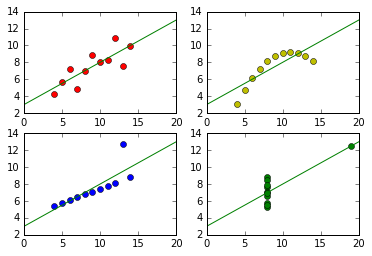

In [2]:
#Load the data
ans = np.load('anscombe.npy')
x = np.linspace(0,20,20)
y = .5*x + 3

#Plot each partition in a different color
plt.subplot(221)
plt.plot(ans[:,0],ans[:,1], 'ro')
plt.plot(x,y, 'g')
plt.subplot(222)
plt.plot(ans[:,2],ans[:,3], 'yo')
plt.plot(x,y, 'g')
plt.subplot(223)
plt.plot(ans[:,4],ans[:,5], 'bo')
plt.plot(x,y, 'g')
plt.subplot(224)
plt.plot(ans[:,6],ans[:,7], 'go')
plt.plot(x,y, 'g')
plt.show()

The above plots demostrate how even though all of the data points have the same least sqares fit line, the clear trend is very different. Plot one looks like a standard scatterplot. Plot two looks like a parabola would fit better. Plot three looks like another line it would match better but the presence of an outlier throws it off. Plot four looks like a vertical line, not a horizontal one.

### Practice with axis, titles and subplots

For this next bit, we will plot a class of polynomials used in applied mathematics.

In [3]:
#Define a function that generates the polynomials
def Bern(X,n,v):
    return misc.comb(n,v) * (X**v) * ((1-X)**(n-v))

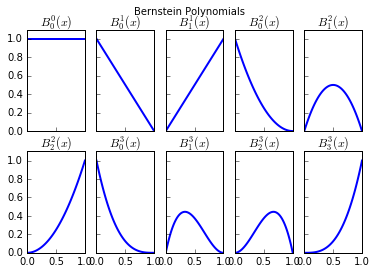

In [4]:
sub = 1
x = np.linspace(0,1,100)
for n in range(4):
    for v in range(n+1):
        plt.subplot(2, 5, sub)
        plt.plot(x, Bern(x,n,v), lw=2)
        plt.axis([0, 1, 0, 1.1])
        #plt.axis("equal")
        # Turn off extra tick marks and axis labels.
        plt.tick_params(which="both", top="off", right="off")
        if sub < 6:        # Remove x-axis label on upper plots.
            plt.tick_params(labelbottom="off")
        if sub % 5 != 1:                   # Remove y-axis label on right plots.
            plt.tick_params(labelleft="off")
        plt.title(r"$B^{}_{}(x)$".format(n,v))
        plt.locator_params(axis="x",nbins=4)
        sub +=1
        
        
plt.suptitle('Bernstein Polynomials')
plt.show()

### Scatter Plots

Next, we'll look at MBL age,height and weight data, then draw a regression line through them.

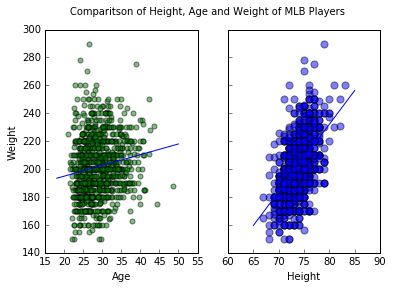

In [5]:
M = np.load('MLB.npy')
#Create a subplot and plot data
plt.subplot(121)
#weight and age
plt.scatter(M[:,2],M[:,1], s=25, c='g',alpha=.5)

#Create a matrix to solve least squares problem
ones = np.ones_like(M[:,2])
A = np.vstack((ones,M[:,2]))
#Solve least squares
x = la.lstsq(A.T,M[:,1])

#plot regression line
domain = np.linspace(18,50)
plt.plot(domain,(x[0][1]*domain + x[0][0]),)
plt.tick_params(which="both", top="off", right="off")
plt.xlabel("Age")
plt.ylabel("Weight")


#Create another subplot
plt.subplot(122)
#Plot age vs weight
plt.scatter(M[:,0],M[:,1], s=50,alpha=.5)

#Solve for regression line
ones = np.ones_like(M[:,0])
A = np.vstack((ones,M[:,0]))
x = la.lstsq(A.T,M[:,1])

#Plot regression line
domain = np.linspace(65,85)
plt.plot(domain,(x[0][1]*domain + x[0][0]),)

plt.tick_params(which="both", top="off", right="off")
plt.tick_params(labelleft="off")
plt.xlabel("Height")

plt.suptitle("Comparitson of Height, Age and Weight of MLB Players")
plt.show()



### Learning about data through visualization

In this section, we look at world earthquake data from 2000-2010 and learn about it through different visualizations

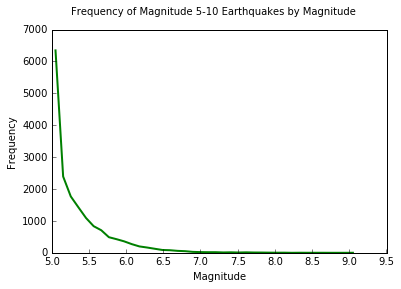

In [6]:
#Load data
year, magnitude, longitude, lattitude = np.load("earthquakes.npy").T

#Call a histogram function to separate the data into bins
freq, bin_edges = np.histogram(magnitude, bins=40)

#Calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#Plot the centers (Creating a continuous distribution)
plt.plot(bin_centers,freq,'g-',lw=2)

plt.tick_params(which="both", top="off", right="off")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.suptitle("Frequency of Magnitude 5-10 Earthquakes by Magnitude")
plt.show()

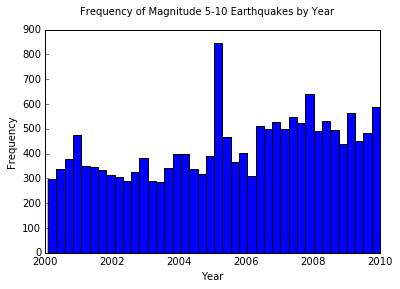

In [7]:
#Plot a histogram of earthquakes by year
plt.hist(year, bins=40)

plt.tick_params(which="both", top="off", right="off")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.suptitle("Frequency of Magnitude 5-10 Earthquakes by Year")
plt.show()

Curiously, the frequncy seems to be increasing!

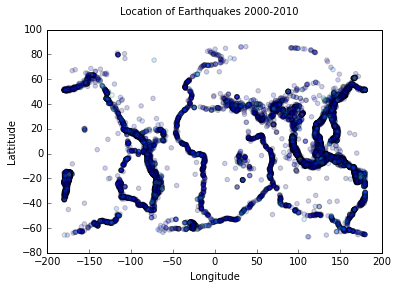

In [8]:
#Scatter plot earthquakes by lattitude and longitude
plt.scatter(longitude,lattitude, s=20, c=magnitude, alpha=.2 )

plt.tick_params(which="both", top="off", right="off")
plt.xlabel("Longitude")
plt.ylabel("Lattitude")
plt.suptitle("Location of Earthquakes 2000-2010")
plt.show()

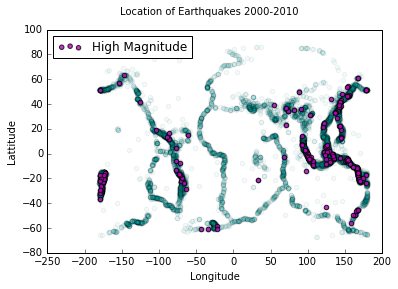

In [9]:
#Repeat the above plot, but highlight the
#high magnitude quakes

#Mask the low magnitude quakes
mask = []
for i in range(len(magnitude)):
    if magnitude[i] >= 7:
        mask.append(i)

#Plot the high and low magnitude in different colors
plt.scatter(longitude,lattitude, s=20, c='c', alpha=.05)
plt.scatter(longitude[mask],lattitude[mask], c="m",s=20,alpha=.8, 
label="High Magnitude")

plt.tick_params(which="both", top="off", right="off")
plt.xlabel("Longitude")
plt.ylabel("Lattitude")
plt.suptitle("Location of Earthquakes 2000-2010")
plt.legend(loc="upper left")
plt.show()

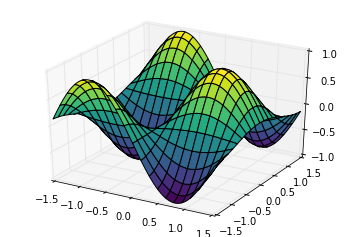

In [10]:
#Practice with a three dimensional plot
x = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(x, x.copy())
Z = np.sin(2*X)*np.cos(2*Y)

fig = plt.figure()
ax = fig.gca(projection='3d')


surf = ax.plot_surface(X,Y,Z,cmap='viridis')

### World data
In the next secion we will look at data about different countries.

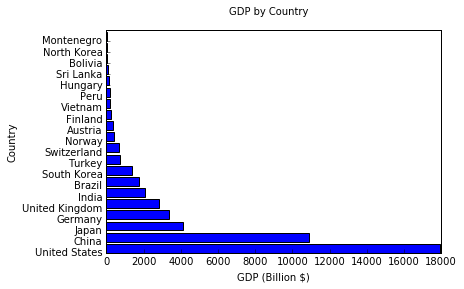

In [11]:
pop, GDP, mheight, fheight = np.load('countries.npy').T
countries = ["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"]
countries = np.array(countries)
#Sort them by GDP
mask = np.argsort(GDP)[::-1]
pos = np.arange(len(GDP))

#Make a horizontal bar graph
plt.barh(pos, GDP[mask])
plt.yticks(pos, countries[mask])

plt.tick_params(which="both", top="off", right="off")
plt.xlabel("GDP (Billion $)")
plt.ylabel("Country")
plt.suptitle("GDP by Country")
plt.show()

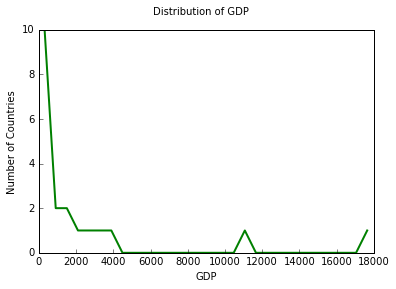

In [12]:
#Create a histogram
freq, bin_edges = np.histogram(GDP, bins=30)
#Find bin centers to make a continuous distribution
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#Plot it
plt.plot(bin_centers,freq,'g-',lw=2)

plt.tick_params(which="both", top="off", right="off")
plt.xlabel("GDP")
plt.ylabel("Number of Countries")
plt.suptitle("Distribution of GDP")
plt.show()

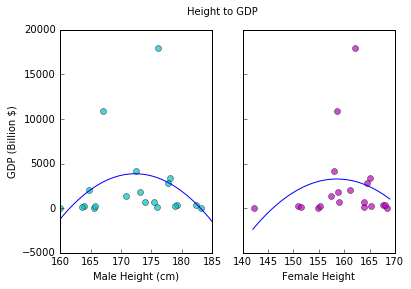

In [13]:
#Plot GDP to Male Height
plt.subplot(121)
plt.plot(mheight,GDP,'co', alpha = .7)

#Least Squares Parabolic Regression Line
ones = np.ones_like(mheight)
A = np.vstack((ones,mheight,mheight**2))
x = la.lstsq(A.T,GDP)
domain = np.linspace(160,185)
plt.plot(domain,(x[0][2]*(domain**2)+x[0][1]*domain + x[0][0]),)

#Clean Up Plot
plt.tick_params(which="both", top="off", right="off")
plt.ylabel("GDP (Billion $)")
plt.xlabel("Male Height (cm)")

plt.subplot(122)
plt.plot(fheight,GDP,'mo', alpha = .7)

#Least Squares Parabolic Regression Line
ones = np.ones_like(fheight)
A = np.vstack((ones,fheight,fheight**2))
x = la.lstsq(A.T,GDP)
domain = np.linspace(142,169)
plt.plot(domain,(x[0][2]*(domain**2)+x[0][1]*domain + x[0][0]),)

#Clean 
plt.tick_params(which="both", top="off", right="off")
plt.tick_params(labelleft="off")
plt.xlabel("Female Height")
plt.suptitle("Height to GDP")
plt.show()


Curiously enough male and female height seem to be normally distributed when compared to GDP. This indicates that countries with average GDP have average height. Assuming GDP and height are normally distrubuted, this could indicate that GDP and height are not corrolated at all.